
# BE Meteo 
## HERVIOUX, SOURDEVAL, MANCIET, DUC-MARTIN, LEFAUCONNIER

In [1]:
path_data <- paste(readLines("path.txt"), collapse = "\n")
path_data

Warning message in readLines("path.txt"):
“incomplete final line found on 'path.txt'”


[1] "/mnt/c/Users/adrie/Downloads/donnees-synop-essentielles-omm.csv"

In [2]:
#install.packages("data.table")
library(data.table)
dataset_meteo <- fread(path_data)
head(dataset_meteo)

ID OMM station Date                Pression au niveau mer
1  7690          2017-04-05 09:00:00 101580                
2 61998          2017-04-05 09:00:00 102720                
3 78925          2018-04-04 03:00:00 101420                
4 61998          2018-04-05 03:00:00 101190                
5  7690          2018-04-05 06:00:00 101240                
6  7149          2018-04-08 03:00:00 100730                
  Variation de pression en 3 heures Type de tendance barométrique
1  100                              2                            
2 -200                              8                            
3   60                              1                            
4   40                              1                            
5  -20                              5                            
6  -20                              5                            
  Direction du vent moyen 10 mn Vitesse du vent moyen 10 mn Température
1  90                            1.3                        289.95     
2 320                           20.1                        285.65     
3 100                            3.6                        298.45     
4 290                            5.1                        278.15     
5 320                            1.6                        284.25     
6  30                            2.3                        285.55     
  Point de rosée Humidité ⋯ Altitude communes (name) communes (code)
1 285.25         74       ⋯  2       Nice            06088          
2 281.95         78       ⋯ 29                                      
3 295.15         82       ⋯  3       Le Lamentin     97213          
4 272.75         68       ⋯ 29                                      
5 280.15         76       ⋯  2       Nice            06088          
6 283.25         86       ⋯ 89       Athis-Mons      91027          
  EPCI (name)                   EPCI (code) department (name) department (code)
1 Métropole Nice Côte d'Azur    200030195   Alpes-Maritimes   06               
2                                      NA                                      
3 CA du Centre de la Martinique 249720061   Martinique        972              
4                                      NA                                      
5 Métropole Nice Côte d'Azur    200030195   Alpes-Maritimes   06               
6 Métropole du Grand Paris      200054781   Essonne           91               
  region (name)              region (code) mois_de_l_annee
1 Provence-Alpes-Côte d'Azur 93            4              
2                            NA            4              
3 Martinique                  2            4              
4                            NA            4              
5 Provence-Alpes-Côte d'Azur 93            4              
6 Île-de-France              11            4

# 1 - Description des données
   
Idées :
- Présentation des données (nombre, type (température pression, lieux...))
- Agrégation des valeurs (par ID station météo, par région ?)
- Carte de la France avec lieux des stations
- Carte avec les températures/pression moyenne/min/max des stations
- Données manquantes

In [3]:
df_meteo <- data.frame(dataset_meteo)
df_meteo <- df_meteo[order(df_meteo$Date), ] # Trier les valeurs par ordre chronologique
head(df_meteo)

ID.OMM.station Date       Pression.au.niveau.mer
452812  7037          2015-08-04 101260                
452813  7168          2015-08-04 100980                
452814 89642          2015-08-04  99140                
459165  7149          2015-08-04 101090                
459167  7222          2015-08-04 101620                
459169  7299          2015-08-04 101390                
       Variation.de.pression.en.3.heures Type.de.tendance.barométrique
452812   40                              0                            
452813 -160                              8                            
452814  340                              1                            
459165  -20                              8                            
459167  130                              3                            
459169   10                              0                            
       Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température
452812 360                            2.1                        289.65     
452813 120                            2.4                        295.85     
452814 120                           14.9                        265.75     
459165 310                            3.2                        297.75     
459167 270                            2.3                        289.65     
459169 170                            2.8                        293.25     
       Point.de.rosée Humidité ⋯ Altitude communes..name.       
452812 287.65         88       ⋯ 151      Boos                  
452813 284.25         48       ⋯ 112      Barberey-Saint-Sulpice
452814 260.45         62       ⋯  43                            
459165 287.55         53       ⋯  89      Athis-Mons            
459167 286.95         84       ⋯  26      Saint-Aignan-Grandlieu
459169 288.45         74       ⋯ 263      Blotzheim             
       communes..code. EPCI..name.                                          
452812 76116           Métropole Rouen Normandie                            
452813 10030           Communauté d'agglomération Troyes Champagne Métropole
452814                                                                      
459165 91027           Métropole du Grand Paris                             
459167 44150           Nantes Métropole                                     
459169 68042           Communauté d'agglomération Saint-Louis Agglomération 
       EPCI..code. department..name. department..code. region..name.   
452812 200023414   Seine-Maritime    76                Normandie       
452813 200069250   Aube              10                Grand Est       
452814        NA                                                       
459165 200054781   Essonne           91                Île-de-France   
459167 244400404   Loire-Atlantique  44                Pays de la Loire
459169 200066058   Haut-Rhin         68                Grand Est       
       region..code. mois_de_l_annee
452812 28            8              
452813 44            8              
452814 NA            8              
459165 11            8              
459167 52            8              
459169 44            8

In [4]:
# colnames(df_meteo)

In [5]:
cat("Nombre de lignes de données :", nrow(df_meteo), "\n")
cat("Nombre de paramètres :", ncol(df_meteo), "\n")
cat("\tdont 14 paramètres décrivant l'emplacement de la station météo\n")
cat("\tdont 19 paramètres relatifs aux nuages/à la nébulosité (+ 4 hauteurs de bases)\n")
cat("\tdont 14 paramètres relatifs à la température\n")
cat("\tdont 7 paramètres relatifs à la pression/barométrie\n")
cat("\tdont 5 paramètres relatifs au vent/rafales\n")
cat("\tdont 5 paramètres relatifs à la pluie (précipitations)\n")
cat("\tdont 3 paramètres relatifs à la neige\n")
cat("\tdont 2 paramètres relatifs à l'humidité/rosée\n")
cat("\t + Date, mois_de_l_annee, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Géopotentiel, Etat.du.sol, Phénomène.spécial.1, Phénomène.spécial.2, Phénomène.spécial.3, Phénomène.spécial.4, Temps.passé.1.1, Temps.présent.1")

# TODO : /!\ Erreur 1 paramètre a dû être compté 2 fois (82 colonnes en tout et mon décompte arrive à 83 paramètres)

Nombre de lignes de données : 1719567 
Nombre de paramètres : 82 
	dont 14 paramètres décrivant l'emplacement de la station météo
	dont 19 paramètres relatifs aux nuages/à la nébulosité (+ 4 hauteurs de bases)


	dont 14 paramètres relatifs à la température
	dont 7 paramètres relatifs à la pression/barométrie
	dont 5 paramètres relatifs au vent/rafales
	dont 5 paramètres relatifs à la pluie (précipitations)
	dont 3 paramètres relatifs à la neige
	dont 2 paramètres relatifs à l'humidité/rosée
	 + Date, mois_de_l_annee, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Géopotentiel, Etat.du.sol, Phénomène.spécial.1, Phénomène.spécial.2, Phénomène.spécial.3, Phénomène.spécial.4, Temps.passé.1.1, Temps.présent.1

### Description des stations météo

In [6]:
# Caractéristiques des stations météo
df_stations <- df_meteo[c('ID.OMM.station', 'Coordonnees', 'Nom', 'Latitude', 'Longitude', 'Altitude', 'communes..name.', 'communes..code.', 'EPCI..name.', 'EPCI..code.', 'department..name.', 'department..code.', 'region..name.', 'region..code.')]
df_unique_stations <- df_stations[!duplicated(df_stations[c('ID.OMM.station')]), ]
cat("Nombre de stations météo :", nrow(df_unique_stations))
head(df_unique_stations[order(df_unique_stations$Nom), ])

Nombre de stations météo : 62

ID.OMM.station Coordonnees          Nom                Latitude
1625518 7005           50.136, 1.834        ABBEVILLE          50.13600
671481  7761           41.918, 8.792667     AJACCIO            41.91800
1474178 7139           48.4455, 0.110167    ALENCON            48.44550
459169  7299           47.614333, 7.51      BALE-MULHOUSE      47.61433
1715295 7790           42.540667, 9.485167  BASTIA             42.54067
1386709 7207           47.294333, -3.218333 BELLE ILE-LE TALUT 47.29433
        Longitude Altitude communes..name. communes..code.
1625518  1.834000  69      Abbeville       80001          
671481   8.792667   5      Ajaccio         2A004          
1474178  0.110167 143      Cerisé          61077          
459169   7.510000 263      Blotzheim       68042          
1715295  9.485167  10      Lucciana        2B148          
1386709 -3.218333  34      Bangor          56009          
        EPCI..name.                                          EPCI..code.
1625518 Communauté d'agglomération de la Baie de Somme       200070993  
671481  Communauté d'agglomération du Pays Ajaccien          242010056  
1474178 Communauté urbaine d'Alençon                         246100663  
459169  Communauté d'agglomération Saint-Louis Agglomération 200066058  
1715295 Communauté de communes de Marana-Golo                200036499  
1386709 Communauté de communes de Belle-Île-en-Mer           245600465  
        department..name. department..code. region..name.   region..code.
1625518 Somme             80                Hauts-de-France 32           
671481  Corse-du-Sud      2A                Corse           94           
1474178 Orne              61                Normandie       28           
459169  Haut-Rhin         68                Grand Est       44           
1715295 Haute-Corse       2B                Corse           94           
1386709 Morbihan          56                Bretagne        53

### Carte des stations météo

In [7]:
#install.packages(c("ggplot2", "maps", "ggmap"))
library(ggplot2)
library(maps)
library(ggmap)

options(repr.plot.width = 20, repr.plot.height = 10)

data_points <- data.frame(
  lon = df_unique_stations$Longitude,
  lat = df_unique_stations$Latitude,
  Ville = df_unique_stations$Nom
)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points, aes(x = lon, y = lat, color = Ville), size = 1) +
  theme_minimal() +
  theme(legend.position = "none") +
  ggtitle("Carte des stations météo")


# Zoom sur l'hexagone  
data_points_metropole <- data_points[(data_points$lat<=52)&(data_points$lat>=42)&(data_points$lon<=10)&(data_points$lon>=-10),]
france <- map_data("france")

ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = lon, y = lat, color = Ville), size = 3) +
  theme_minimal() +
  # theme(legend.position = "none") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Carte des stations météo de France métropolitaine")

ERROR: Error in library(maps): there is no package called ‘maps’


### Relevé de températures par station

In [ ]:
for (ville in unique(df_meteo$Nom)){
  plot(
    df_meteo$Date[df_meteo$Nom==ville],
    df_meteo$`Température`[df_meteo$Nom==ville],
    xlab = "Date",
    ylab = "Température",
    main = ville,
    type = "l",
)}

### Valeurs moyennes des grandeurs mesurées par station

In [ ]:
# install.packages("dplyr")
library(dplyr)

df_grouped <- df_meteo %>%
  group_by(ID.OMM.station) %>%
  summarise(n_mesures = n(),
            T_mean = mean(`Température`,na.rm = TRUE),
            T_min = min(`Température`,na.rm = TRUE),
            T_max = max(`Température`,na.rm = TRUE),
            P_mean = mean(Pression.au.niveau.mer,na.rm = TRUE),
            nebulosite_mean = mean(Nebulosité.totale, na.rm = TRUE)
            )

head(df_grouped)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ID.OMM.station n_mesures T_mean   T_min  T_max  P_mean   nebulosite_mean
1 7005           29191     284.7995 265.65 314.35 101652.1 72.55759       
2 7015           29365     285.1373 265.55 314.55 101631.3 96.49914       
3 7020           29041     285.9265 270.05 305.25 101625.5 69.14118       
4 7027           29208     285.0625 266.45 312.65 101687.4 94.13673       
5 7037           29375     284.6429 264.15 314.05 101687.3 94.67241       
6 7072           29387     284.8362 262.55 314.05 101703.0 97.29704

### Carte des températures extrêmes mesurées par station

In [ ]:
df_station_stats <- merge(x = df_unique_stations, y = df_grouped, by = "ID.OMM.station", all = TRUE)

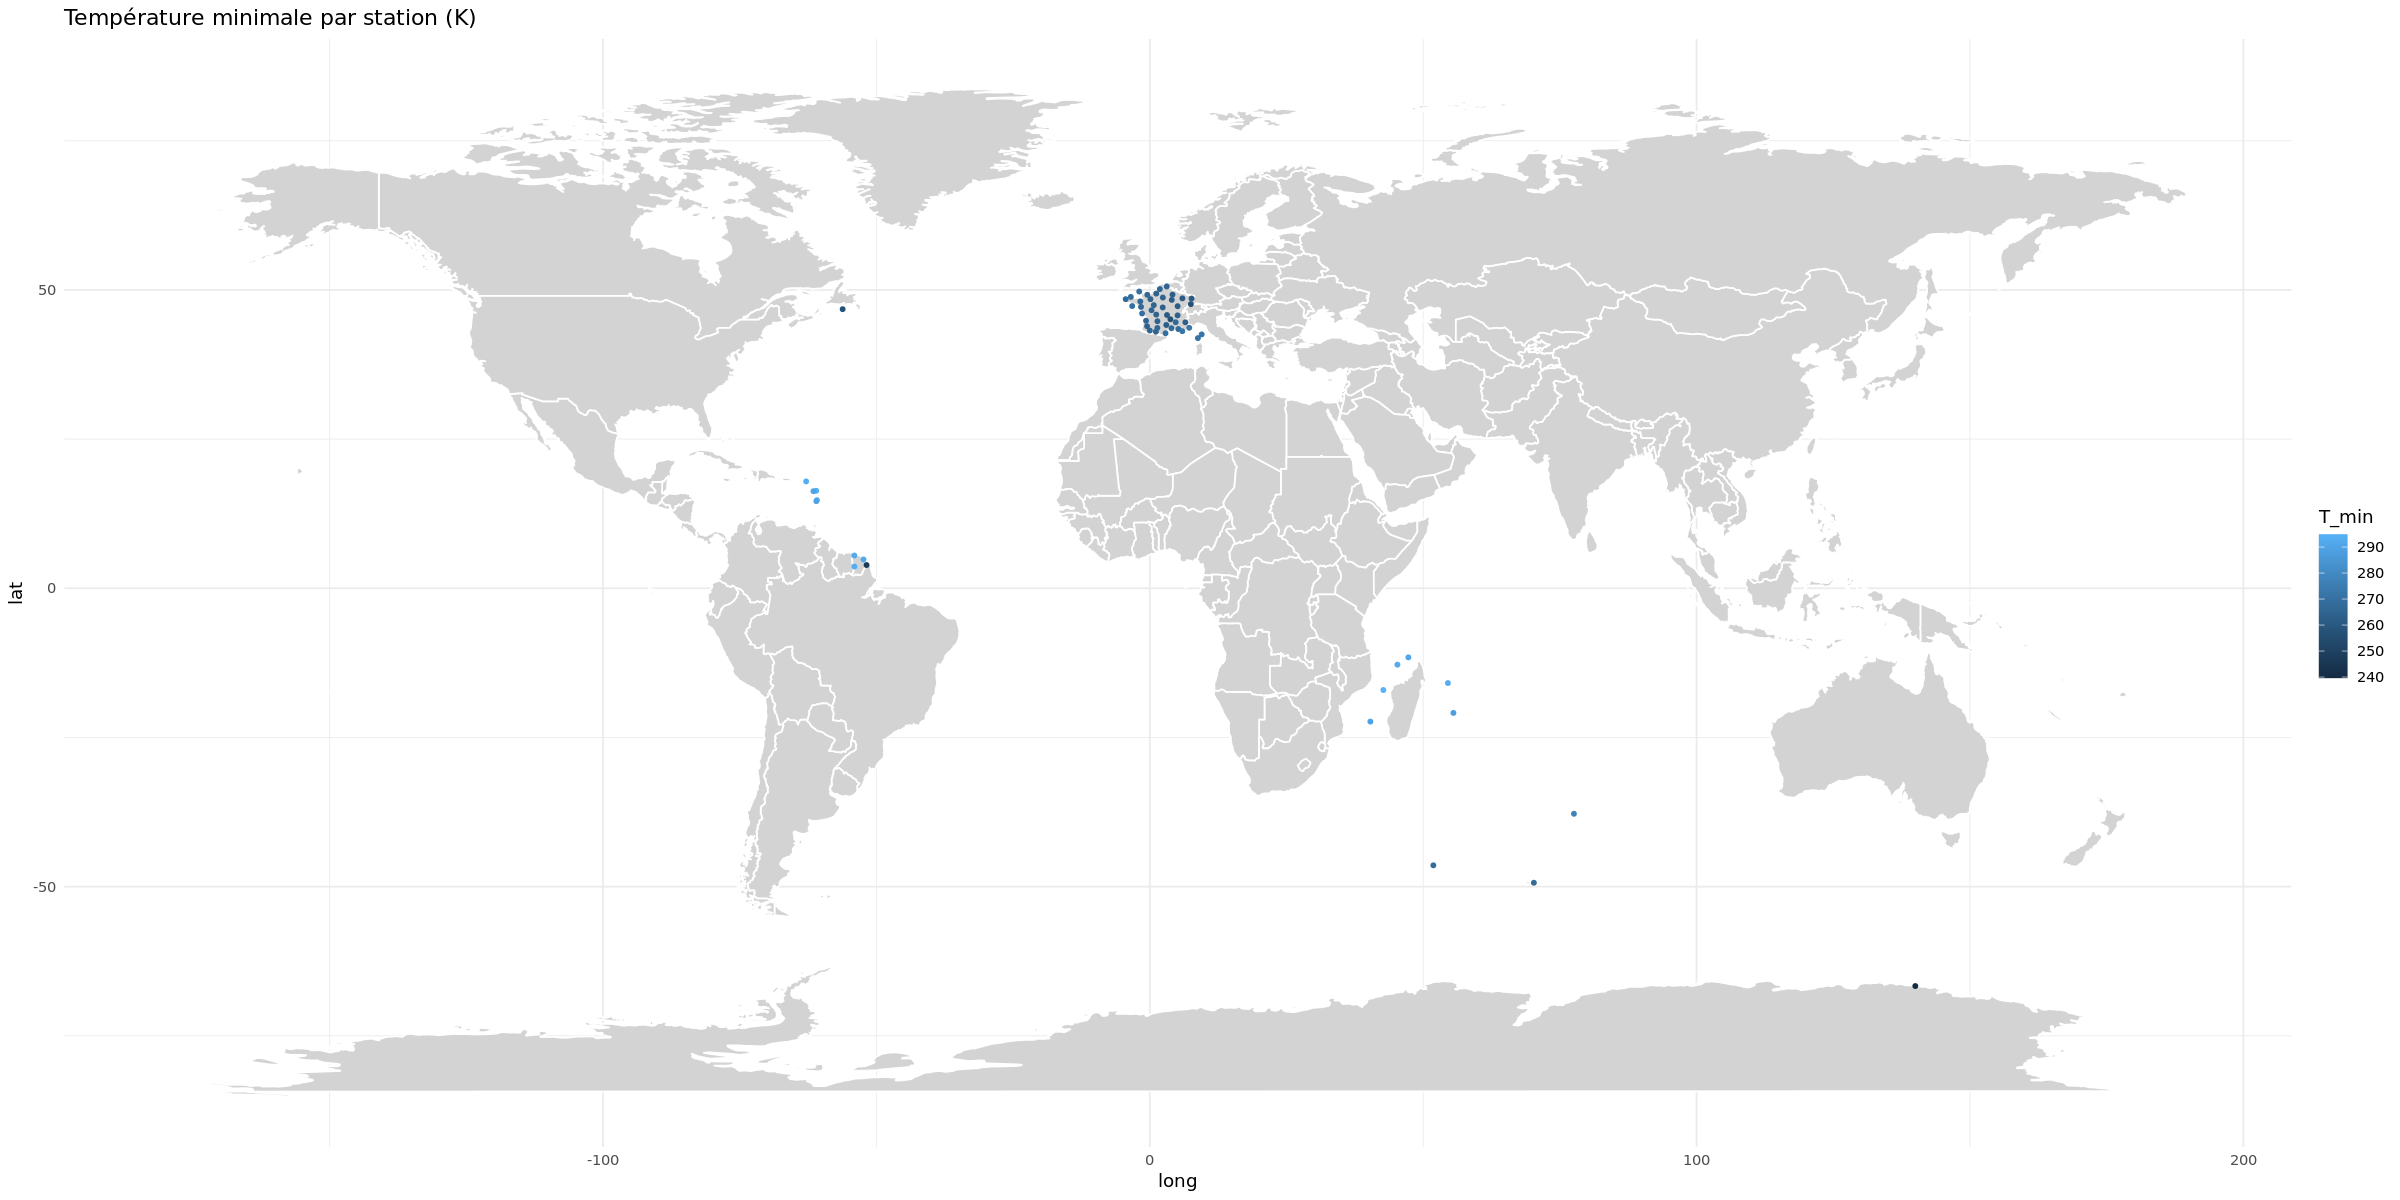

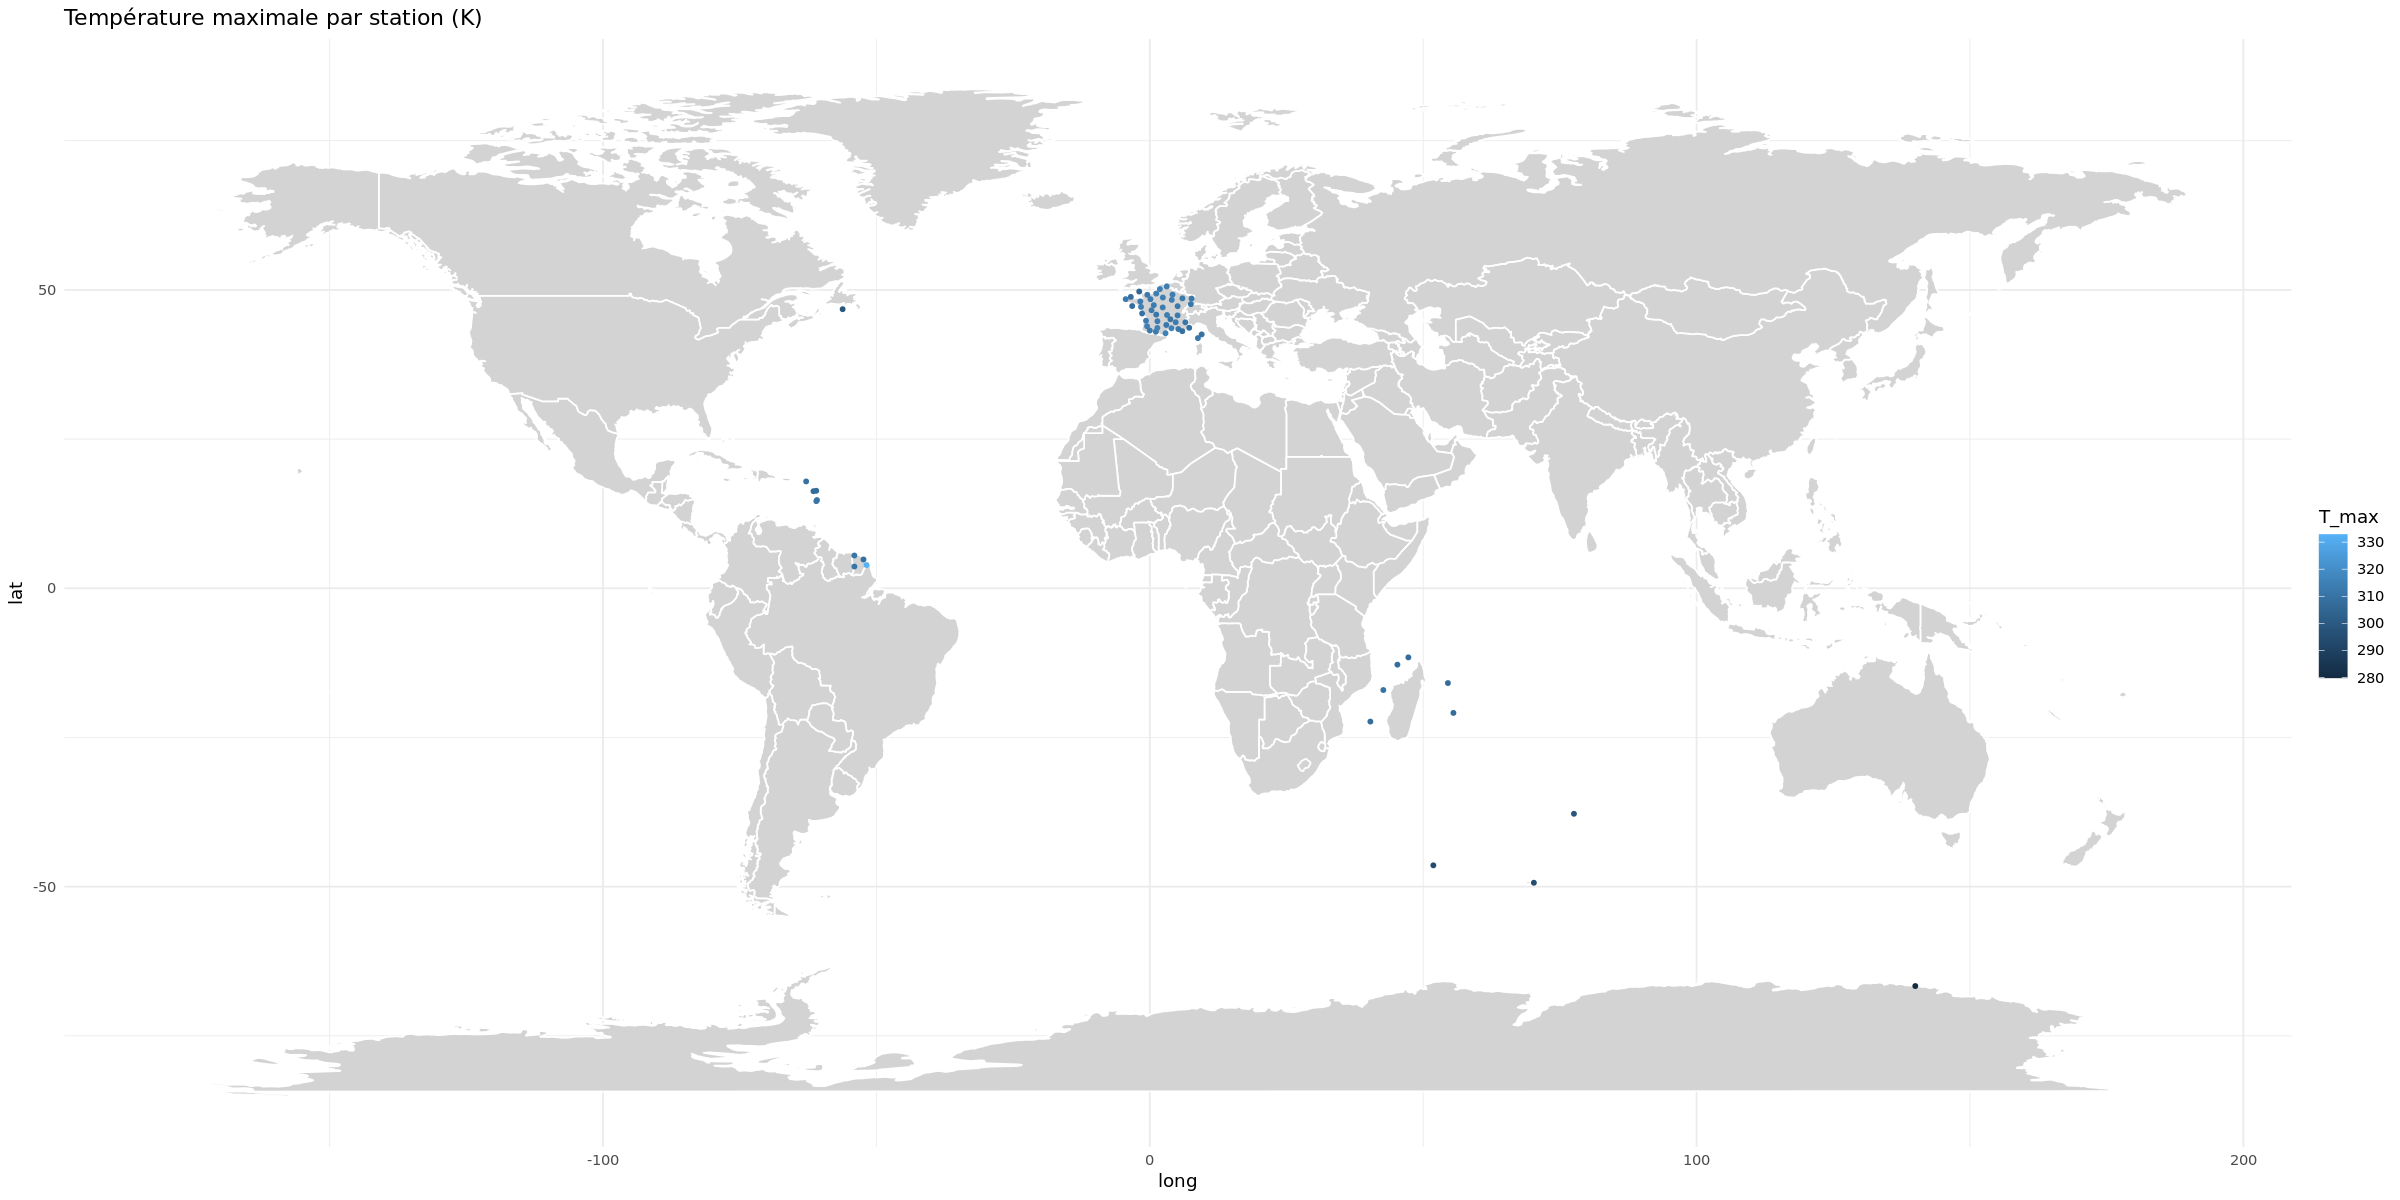

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_min), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température minimale par station (K)")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_max), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température maximale par station (K)")

In [ ]:
summary(dataset_meteo)

 ID OMM station       Date                     Pression au niveau mer
 Min.   : 7005   Min.   :2015-08-04 00:00:00   Min.   : 93850        
 1st Qu.: 7207   1st Qu.:2018-03-14 03:00:00   1st Qu.:101180        
 Median : 7577   Median :2020-09-25 06:00:00   Median :101600        
 Mean   :26062   Mean   :2020-09-15 03:41:58   Mean   :101577        
 3rd Qu.:61976   3rd Qu.:2023-03-21 21:00:00   3rd Qu.:102090        
 Max.   :89642   Max.   :2025-09-03 21:00:00   Max.   :107570        
                                               NA's   :94370         
 Variation de pression en 3 heures Type de tendance barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000 

# 2. Un calcul et étude d'estimateur

Thibault

Température moyenne ou pluie moyenne en fonction des régions

In [ ]:
#library(dplyr)

data_temp <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$Température,
  mois = df_meteo$mois_de_l_annee
)

moy<-list()
for ( j in 1:9 ) {
  moy<-list()
  data_filter_mois <- filter(data_temp, mois==j)
  for (i in 2015:2025) {
	  data_filtered <- filter(data_filter_mois, format(date,"%Y")==sprintf("%d", i))
    moy[[as.character(i)]] <- mean(data_filtered$temp, na.rm = TRUE)
  }
  plot(2015:2025,moy,main=sprintf('Moyenne de température sur les mois de %d pour toutes les stations',j))
}

# 3. Des tests statistiques (au moins un sur un paramètre et une ANOVA)

Colin

# 4. Une régression et étude de corrélation

Pression et précipitations ?

Anaïs

# 5. Une ACP et une PLS

Nuages/nébulosité

Adrien

$\small\textbf{Introduction : }$ Commençons par analyser les corrélations entre différentes variables deux à deux autour du sujet de la nébulosité. 

In [116]:
df_meteo$Nom

[1] "ROUEN-BOOS"          "TROYES-BARBEREY"     "DUMONT D'URVILLE"   
    [4] "ORLY"                "NANTES-BOUGUENAIS"   "BALE-MULHOUSE"      
    [7] "PTE DE CHASSIRON"    "POITIERS-BIARD"      "LE PUY-LOUDES"      
   [10] "SAINT GEORGES"       "EMBRUN"              "NICE"               
   [13] "LE RAIZET AERO"      "PTE DE LA HAGUE"     "TOURS"              
   [16] "MARIPASOULA"         "BORDEAUX-MERIGNAC"   "PERPIGNAN"          
   [19] "BREST-GUIPAVAS"      "TROMELIN"            "ST-PIERRE"          
   [22] "AJACCIO"             "CAEN-CARPIQUET"      "REIMS-PRUNAY"       
   [25] "PLOUMANAC'H"         "LILLE-LESQUIN"       "KERGUELEN"          
   [28] "CAYENNE-MATOURY"     "MONTELIMAR"          "MONTPELLIER"        
   [31] "MILLAU"              "TARBES-OSSUN"        "TOULOUSE-BLAGNAC"   
   [34] "CLERMONT-FD"         "CAP CEPET"           "LYON-ST EXUPERY"    
   [37] "LAMENTIN-AERO"       "RENNES-ST JACQUES"   "STRASBOURG-ENTZHEIM"
   [40] "BELLE ILE-LE TALUT"  "BOURGES"             "GOURDON"            
   [43] "ALENCON"             "DIJON-LONGVIC"       "NOUVELLE AMSTERDAM" 
   [46] "NANCY-OCHEY"         "CROZET"              "TRINITE-CARAVEL"    
   [49] "LIMOGES-BELLEGARDE"  "MARIGNANE"           "MONT-DE-MARSAN"     
   [52] "SAINT LAURENT"       "ABBEVILLE"           "ST GIRONS"          
   [55] "BASTIA"              "PTE DE LA HAGUE"     "SAINT GEORGES"      
   [58] "POITIERS-BIARD"      "TOURS"               "LAMENTIN-AERO"      
   [61] "STRASBOURG-ENTZHEIM" "KERGUELEN"           "LILLE-LESQUIN"      
   [64] "LE PUY-LOUDES"       "BALE-MULHOUSE"       "NANCY-OCHEY"        
   [67] "MARIPASOULA"         "GOURDON"             "SAINT LAURENT"      
   [70] "ABBEVILLE"           "LIMOGES-BELLEGARDE"  "MONT-DE-MARSAN"     
   [73] "BASTIA"              "REIMS-PRUNAY"        "DIJON-LONGVIC"      
   [76] "BORDEAUX-MERIGNAC"   "MILLAU"              "CAP CEPET"          
   [79] "NANTES-BOUGUENAIS"   "LYON-ST EXUPERY"     "MONTELIMAR"         
   [82] "MONTPELLIER"         "AJACCIO"             "CROZET"             
   [85] "ST-PIERRE"           "EMBRUN"              "PLOUMANAC'H"        
   [88] "PTE DE CHASSIRON"    "BOURGES"             "ST GIRONS"          
   [91] "CAEN-CARPIQUET"      "BREST-GUIPAVAS"      "ALENCON"            
   [94] "MARIGNANE"           "TROYES-BARBEREY"     "RENNES-ST JACQUES"  
   [97] "CAYENNE-MATOURY"     "ROUEN-BOOS"          "TOULOUSE-BLAGNAC"   
  [100] "BELLE ILE-LE TALUT"  "CLERMONT-FD"         "TARBES-OSSUN"       
  [103] "NICE"                "PERPIGNAN"           "DUMONT D'URVILLE"   
  [106] "BREST-GUIPAVAS"      "GOURDON"             "ALENCON"            
  [109] "MARIGNANE"           "PAMANDZI"            "POITIERS-BIARD"     
  [112] "MILLAU"              "KERGUELEN"           "AJACCIO"            
  [115] "LILLE-LESQUIN"       "BOURGES"             "TOURS"              
  [118] "MONTPELLIER"         "ABBEVILLE"           "DIJON-LONGVIC"      
  [121] "BASTIA"              "BORDEAUX-MERIGNAC"   "ORLY"               
  [124] "LYON-ST EXUPERY"     "MONTELIMAR"          "PTE DE CHASSIRON"   
  [127] "ST-PIERRE"           "TOULOUSE-BLAGNAC"    "ST GIRONS"          
  [130] "PTE DE LA HAGUE"     "NOUVELLE AMSTERDAM"  "MARIPASOULA"        
  [133] "DUMONT D'URVILLE"    "ROUEN-BOOS"          "NANCY-OCHEY"        
  [136] "TARBES-OSSUN"        "LAMENTIN-AERO"       "CAYENNE-MATOURY"    
  [139] "TROYES-BARBEREY"     "LE PUY-LOUDES"       "GILLOT-AEROPORT"    
  [142] "REIMS-PRUNAY"        "STRASBOURG-ENTZHEIM" "CLERMONT-FD"        
  [145] "MONT-DE-MARSAN"      "RENNES-ST JACQUES"   "NICE"               
  [148] "PERPIGNAN"           "LE RAIZET AERO"      "PLOUMANAC'H"        
  [151] "SAINT GEORGES"       "NANTES-BOUGUENAIS"   "EMBRUN"             
  [154] "CAP CEPET"           "CROZET"              "CAEN-CARPIQUET"     
  [157] "BELLE ILE-LE TALUT"  "LIMOGES-BELLEGARDE"  "BALE-MULHOUSE"      
  [160] "PLOUMANAC'H"         "STRASBOURG-ENTZHEIM" "AJACCIO"            
  [163] 

In [131]:
sub <- df_meteo[df_meteo$Date > "2021-01-01 00:00:00 UTC" & df_meteo$Date <= "2021-12-31 00:00:00 UTC" & df_meteo$Nom == "TOULOUSE-BLAGNAC", ]

In [132]:
var <- c(
  "Température...C.", "Humidité", "Pression.station",
  "Visibilité.horizontale", "Précipitations.dans.les.24.dernières.heures",
  "Nebulosité.totale", "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"
)

X_focus <- sub[, var]
X_focus <- na.omit(X_focus)

library(FactoMineR)

res_pca_focus <- PCA(X_focus, scale.unit = TRUE, graph = TRUE)
# res_pca_focus$eig
# res_pca_focus$var

$\small\textbf{Lancement de l'ACP}$

Nous allons utiliser la librairie factominer. 

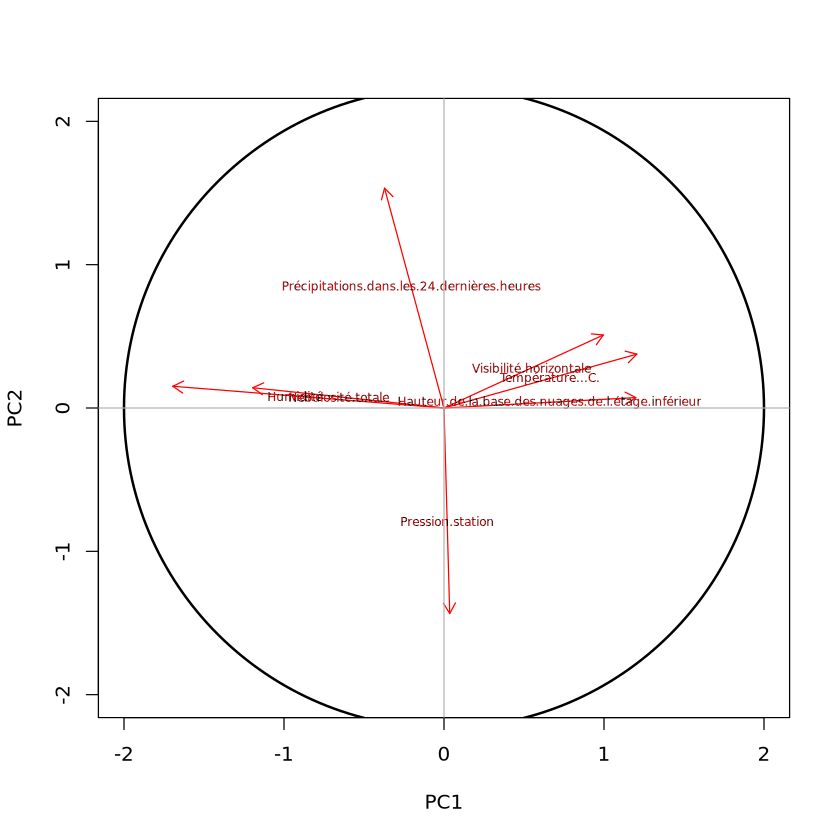

In [133]:
var.coord <- res_pca_focus$var$coord[,1:2]
plot(var.coord, type='n',xlim=c(-2,2), ylim=c(-2,2), xlab="PC1", ylab = "PC2")
symbols(0,0, circles=2, inches=FALSE, add=TRUE, lwd=2)
arrows(0,0, var.coord[,1]*2, var.coord[,2]*2, length=0.1, col='red')
text(var.coord[,1]*1.1, var.coord[,2]*1.1, labels = rownames(var.coord), col ="red", cex = 0.6)
abline(h=0, v=0, col='grey70')

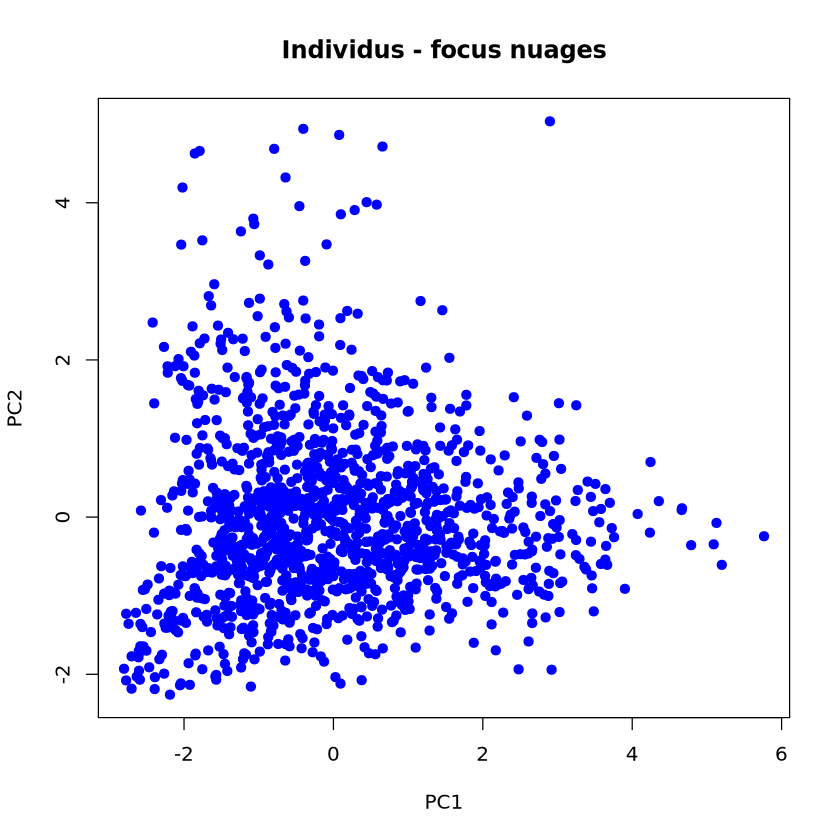

In [134]:
ind.coord <- res_pca_focus$ind$coord[,1:2]
plot(ind.coord, xlab="PC1", ylab="PC2", main="Individus - focus nuages", pch=19, col="blue")

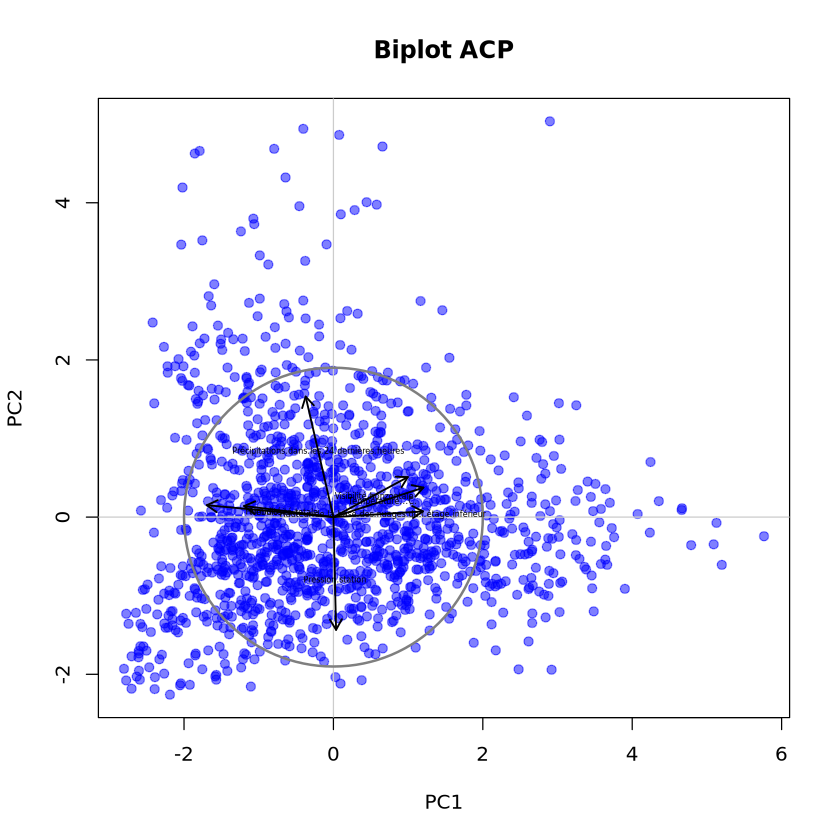

In [135]:
# Coordonnées
ind.coord <- res_pca_focus$ind$coord[,1:2]  # individus
var.coord <- res_pca_focus$var$coord[,1:2]  # variables


# 1. Base plot
plot(ind.coord[,1], ind.coord[,2],
     xlab="PC1", ylab="PC2", main="Biplot ACP",
     pch=19, col=rgb(0,0,1,0.5))  # individus en bleu transparent
abline(h=0,v=0,col="grey80")

# 2. Cercle de corrélation
symbols(0,0, circles=2, inches=FALSE, add=TRUE, lwd=2, fg="grey50")

# 3. Vecteurs des variables
arrows(0,0,var.coord[,1]*2,var.coord[,2]*2,length=0.1,col="black", lwd=1.5)
text(var.coord[,1]*1.1, var.coord[,2]*1.1,
     labels=rownames(var.coord), col="black", cex=0.4)


$\small\textbf{Conclusion sur l'ACP}$

Nous remarquons que sur notre jeu de données, il y a une forte corrélation entre l'humidité, la hauteur des nuages et la visibilité. Cela fait sens : plus les nuages sont haut, plus la visibilité est élevée (corrélation positive).
La corrélation négative entre l'humidité et la hauteur des nuages et la visibilité est moins évidente. 
Enfin, la pression semble être corrélée négativement avec les précipitations, et ces deux variables sont orthogonales aux variables sur la nébulosité et l'humidité. 

$\small\textbf{Mise en PLS}$

In [139]:
install.packages("pls")
library(pls)


Installing package into ‘/home/adrie/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




Data: 	X dimension: 1447 4 
	Y dimension: 1447 1
Fit method: kernelpls
Number of components considered: 4

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV           6.953    6.431    6.415    6.408    6.409
adjCV        6.953    6.430    6.413    6.406    6.407

TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps
X    41.10    55.03    73.80   100.00
Y    15.18    15.98    16.02    16.02



Loadings:
                                                   Comp 1 Comp 2 Comp 3 Comp 4
Température...C.                                   -0.522  0.894 -0.292 -0.282
Pression.station                                          -0.236  0.615 -0.810
Humidité                                            0.710  0.472  0.267  0.126
Hauteur.de.la.base.des.nuages.de.l.étage.inférieur -0.491         0.684  0.498

               Comp 1 Comp 2 Comp 3 Comp 4
SS loadings     1.017  1.078  1.002  1.000
Proportion Var  0.254  0.269  0.250  0.250
Cumulative Var  0.254  0.524  0.774  1.024

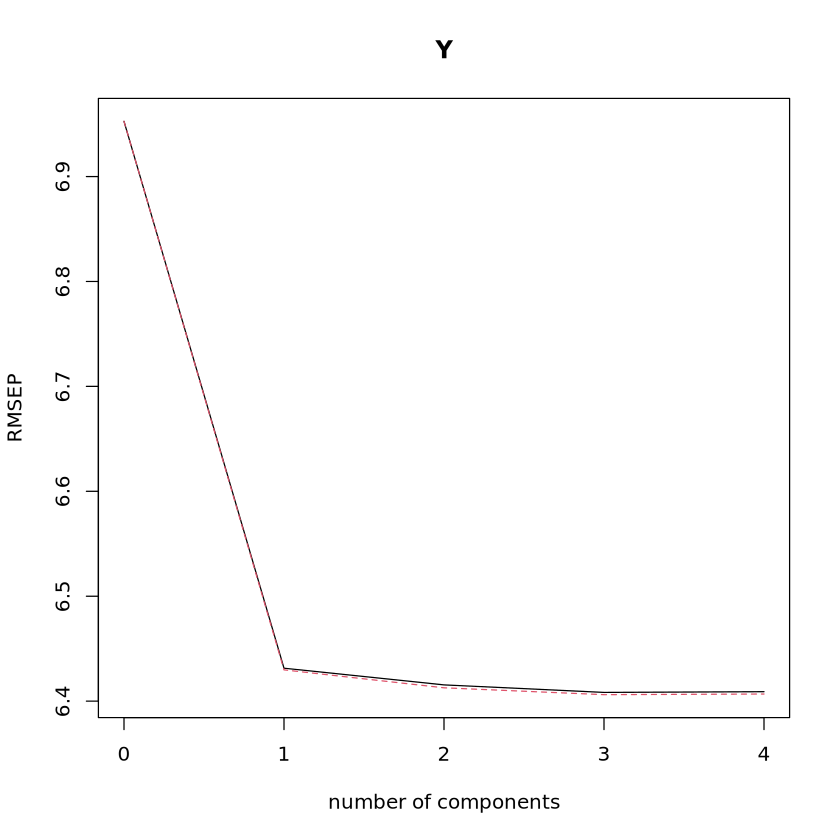

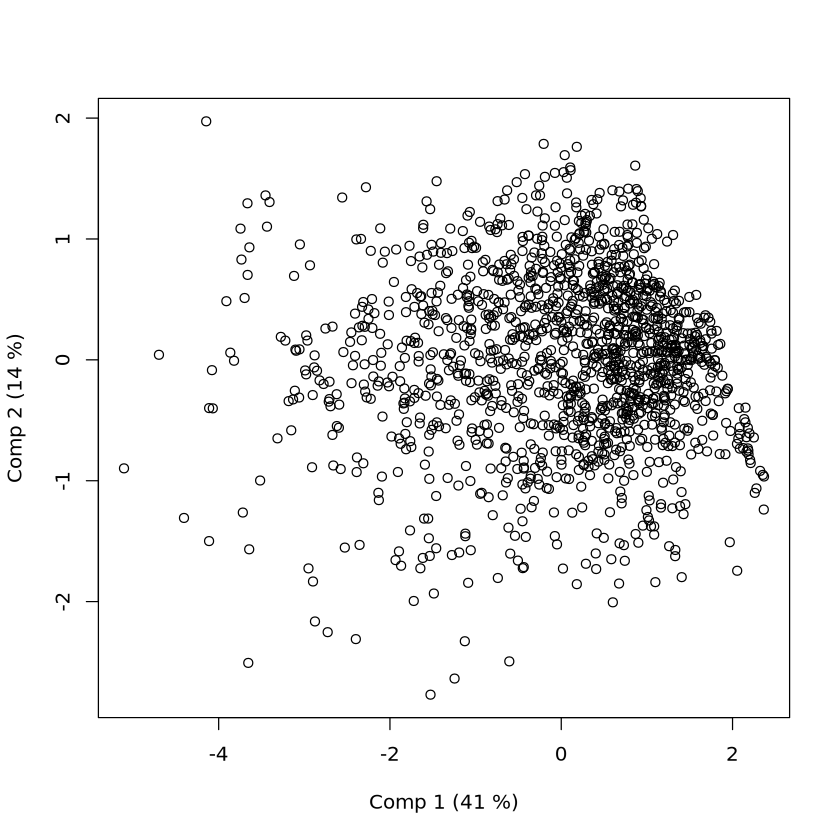

In [143]:
# "Température...C.", "Humidité", "Pression.station",
#   "Visibilité.horizontale", "Précipitations.dans.les.24.dernières.heures",
#   "Nebulosité.totale", "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"
# Exemple : prédire précipitations
X <- sub[, c("Température...C.", "Pression.station", "Humidité","Hauteur.de.la.base.des.nuages.de.l.étage.inférieur" )]
Y <- sub$`Nebulosité.totale`

# Modèle PLS
mod_pls <- plsr(Y ~ ., data=data.frame(X, Y), scale=TRUE, validation="CV")

# Résumé
summary(mod_pls)
loadings(mod_pls)
# Graphiques utiles
plot(RMSEP(mod_pls))   # erreur de prédiction en fonction du nb de composantes
plot(mod_pls, plottype="scores", comps=1:2)  # individus dans l'espace PLS


# 6. Une méthode de clustering

Groupes de stations par rapport aux températures ? -> essayer de retrouver leur répartition géographique

Lise